<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Marco Roco Arias</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


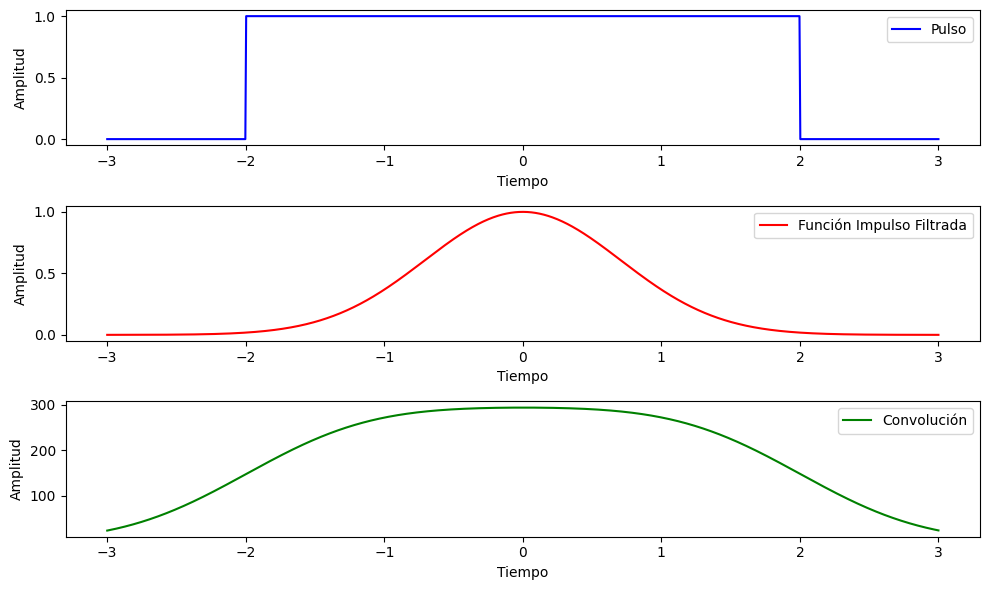

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# Definición de las funciones
def pulso(t):
    return np.where((t >= -2) & (t <= 2), 1, 0)

def impulso_filtrado(t):
    return np.exp(-t**2)

# Definición del intervalo de tiempo
t = np.linspace(-3, 3, 1000)  # de 0 a 6 segundos, por ejemplo

# Calculando la convolución
convolucion = np.convolve(impulso_filtrado(t),pulso(t), mode='same')

# Graficando las funciones y la convolución
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pulso(t), 'b', label='Pulso')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, impulso_filtrado(t), 'r', label='Función Impulso Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, convolucion, 'g', label='Convolución')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()




## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


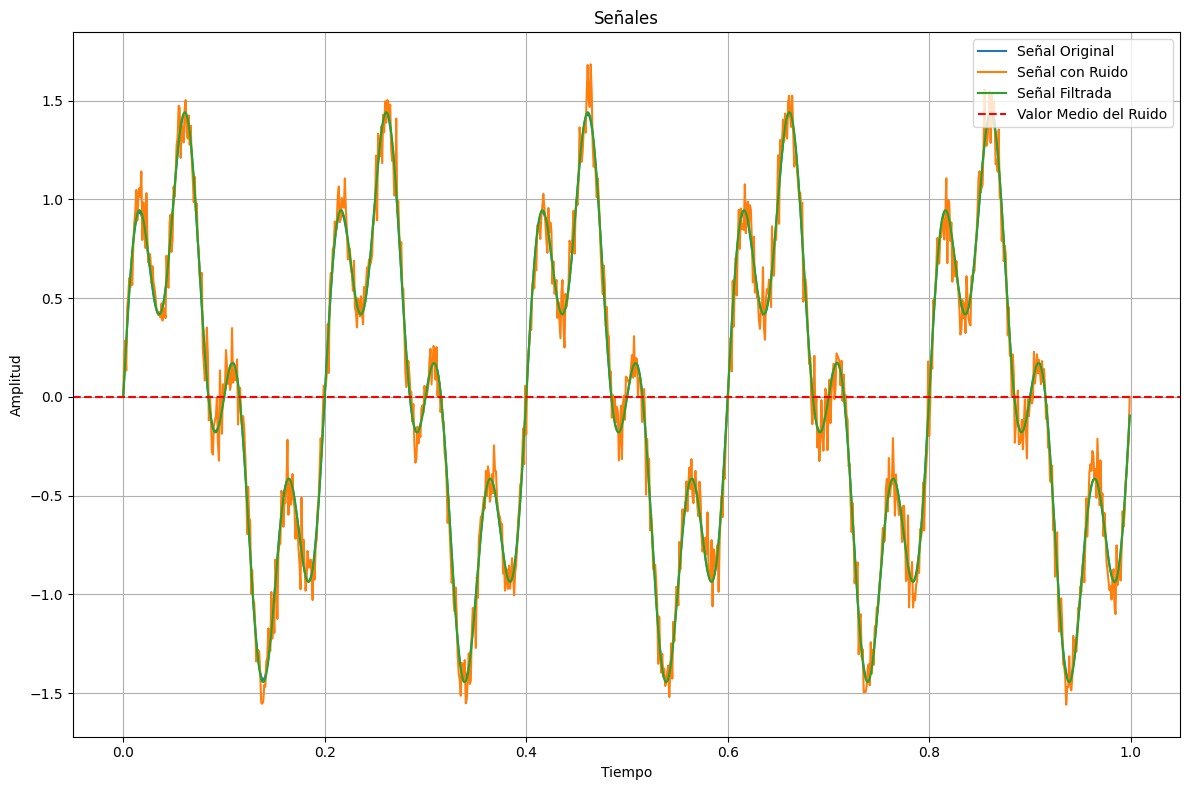

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Se genera señal original
def generar_senial_original(tiempo):
    return np.sin(2 * np.pi * 5 * tiempo) + 0.5 * np.sin(2 * np.pi * 20 * tiempo)

# Paso 2: Se agrega ruido gaussiano a la señal original
def agregar_ruido(senial, mean=0, std=0.1):
    ruido = np.random.normal(mean, std, senial.shape)
    return senial + ruido

# Paso 3: Se calcula el valor medio de la señal con ruido
def calcular_valor_medio(senial_ruidosa):
    return np.mean(senial_ruidosa)

# Paso 4: Implementar transformaciones y filtrado
def aplicar_transformaciones_y_filtrado(senal_ruidosa):
    # Aplicar transformada de Fourier
    fft_senal_ruidosa = np.fft.fft(senal_ruidosa)
    
    # Obtener umbral para filtrado
    umbral_filtrado = 0.1 * np.max(np.abs(fft_senal_ruidosa))
    
    # Filtrar frecuencias no deseadas
    fft_filtrada = fft_senal_ruidosa.copy()
    fft_filtrada[np.abs(fft_filtrada) < umbral_filtrado] = 0
    
    # Aplicar transformada inversa de Fourier para obtener la señal filtrada
    senal_filtrada = np.fft.ifft(fft_filtrada).real
    
    return senal_filtrada

# Parámetros
fs = 1000
tiempo = np.arange(0, 1, 1/fs)
senal_original = generar_senial_original(tiempo)
senal_ruidosa = agregar_ruido(senal_original)

# Proceso de denoising
valor_medio_ruido = calcular_valor_medio(senal_ruidosa)
senal_filtrada = aplicar_transformaciones_y_filtrado(senal_ruidosa)

# Se grafican los resultados
plt.figure(figsize=(12, 8))

plt.plot(tiempo, senal_original, label='Señal Original')
plt.plot(tiempo, senal_ruidosa, label='Señal con Ruido')
plt.plot(tiempo, senal_filtrada, label='Señal Filtrada')

plt.axhline(valor_medio_ruido, color='r', linestyle='--', label='Valor Medio del Ruido')

plt.title('Señales')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


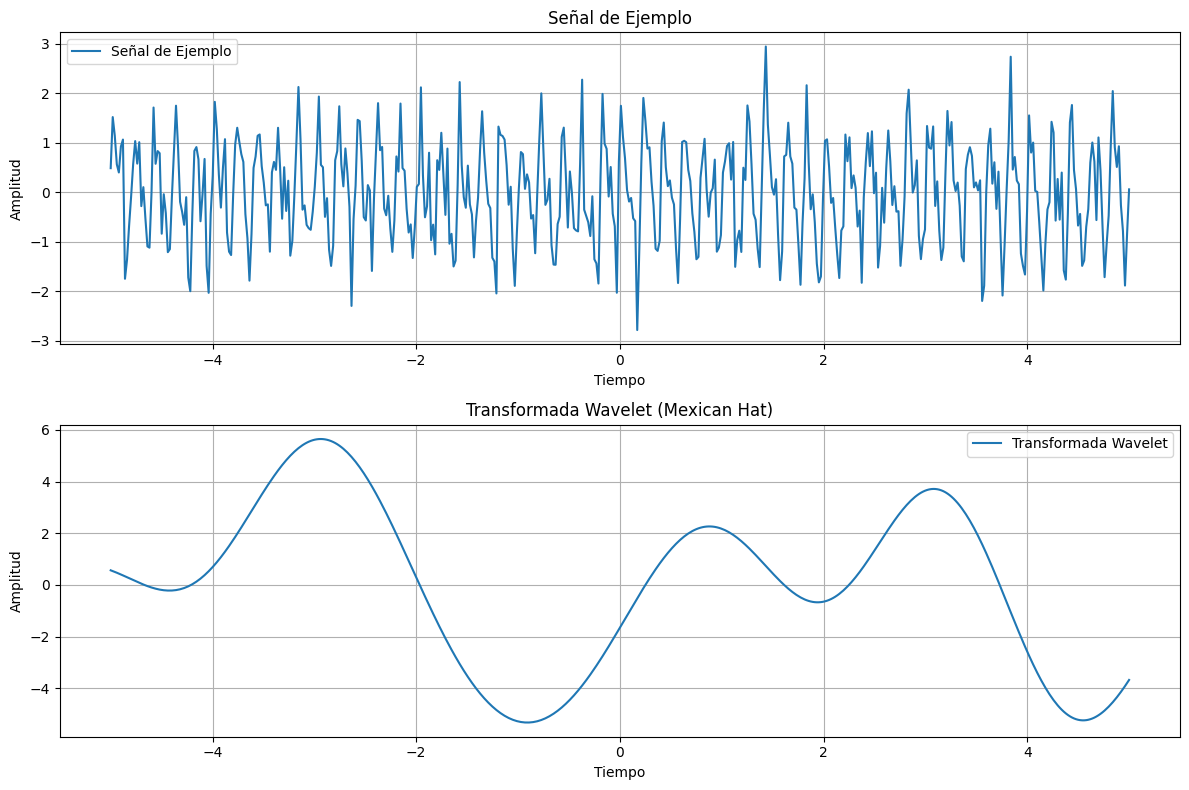

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Se define la señal de ejemplo con componentes de alta frecuencia y ruido
t = np.linspace(-5, 5, 500)
senal_ejemplo = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 0.5, t.shape)

# Resto del código sigue igual
def mexican_hat(x, mu, sigma):
    return (2 / (np.sqrt(3 * sigma) * np.pi**0.25)) * (1 - (x - mu)**2 / sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Se define los parámetros de la Mexican Hat Wavelet
mu = 0
sigma = 1

# Se aplica la transformada wavelet a la señal de ejemplo en diferentes escalas y posiciones
wavelet_transform = np.zeros_like(senal_ejemplo)
for i, ti in enumerate(t):
    wavelet_transform[i] = np.sum(senal_ejemplo * mexican_hat(t - ti, mu, sigma))

# Se grafica la señal de ejemplo y su transformada wavelet
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, senal_ejemplo, label='Señal de Ejemplo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de Ejemplo')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, wavelet_transform, label='Transformada Wavelet')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Transformada Wavelet (Mexican Hat)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()






### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()


Se define la función psi_mn(psi, m, n) para calcular una wavelet específica utilizando una wavelet base psi, un factor de escala m y un factor de posición n. Posteriormente, se genera una wavelet base psi utilizando la función mexican_hat() con parámetros de escala y posición predeterminados. Se establecen los límites xlim para la visualización. Se crean listas de valores ns y ms para diferentes factores de posición n y escala m, respectivamente.

Dentro de un bucle, para cada valor de m en la lista ms, se crea un subplot con un número de columnas igual a len(ms). Dentro de cada subplot, para cada valor de n en la lista ns, se grafica la wavelet generada con psi_mn() para los valores de m y n dados. Se agrega un título al subplot indicando m y una leyenda para n. Se limitan los valores en el eje x según xlim. Finalmente, se muestra la figura.

### 3.2.2 completa el siguiente código para realizar la transformada


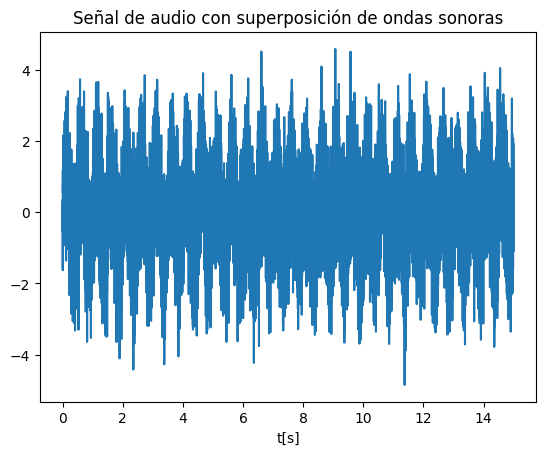

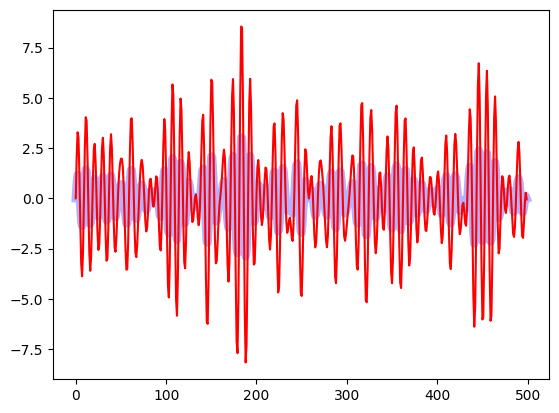

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la wavelet genérica
def wavelet(x):
    # Aquí defines tu función wavelet
    return np.exp(-x**2 / 2) * np.cos(5 * x)

# Implementación de la transformada wavelet considerando la suma sobre la sección en estudio
def twav_mn(f, psi, m, n):
    a_0 = 2
    b_0 = 1
    a = a_0**m
    b = n * b_0 * a_0**m
    psi_mn = a_0**(-m / 2) * psi(a_0**(-m) * (np.arange(len(f)) - n * b_0))
    return np.sum(f * psi_mn)

# Implementación de la transformada wavelet naive, sumando sobre toda la longitud
def twav_mn_naive(f, psi, m, n):
    a_0 = 2
    b_0 = 1
    pmn = psi(a_0**(-m) * (np.arange(len(f)) - n * b_0))
    return np.sum(f * pmn)

# Parámetros
m = 3
ns = np.arange(1000, 1500)
res = 1000
freq = 2

# Crear una señal para analizar
x = np.arange(0, 15000, 1)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

# Realizar la transformada wavelet
transformed_sweep = [twav_mn(audio, wavelet, m, n) for n in ns]
naive_transformed_sweep = [twav_mn_naive(audio, wavelet, m, n) for n in ns]

# Graficar la señal de audio
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("Señal de audio con superposición de ondas sonoras")
plt.show()

# Graficar la transformada wavelet
plt.plot(transformed_sweep, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweep, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

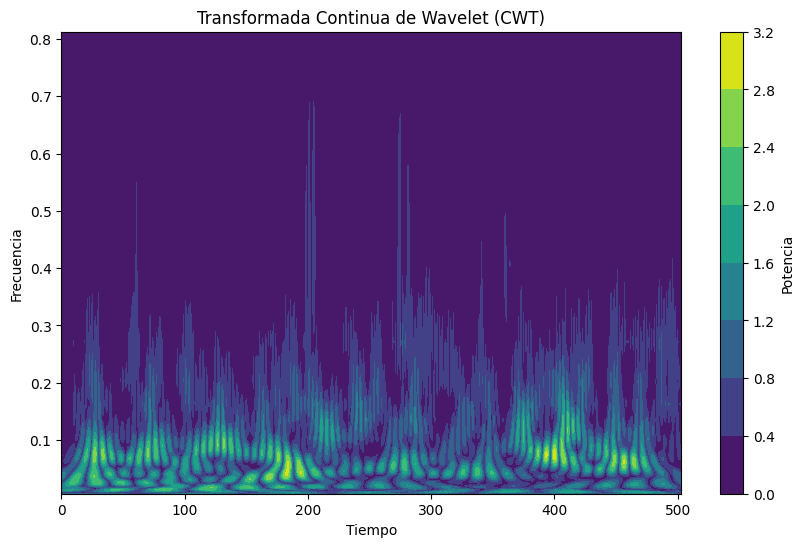

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import requests

# Descargar los datos
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
response = requests.get(url)
data = response.text.strip().split("\n")
data = np.array([float(x) for x in data])

# Calcular la transformada continua de wavelet (CWT)
coeficientes, frecuencias = pywt.cwt(data, np.arange(1, 129), 'morl')  # Usando la wavelet de Morlet

# Convertir los coeficientes a potencia
potencia = (np.abs(coeficientes)) ** 0.8

# Graficar el resultado en el dominio de la frecuencia y el tiempo
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(data)), frecuencias, potencia, cmap='viridis')
plt.colorbar(label='Potencia')
plt.title('Transformada Continua de Wavelet (CWT)')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

En resumen, el gráfico de la transformada wavelet proporciona una representación detallada de cómo las frecuencias dominantes en los datos del fenómeno del Niño varían a lo largo del tiempo. Esto permite identificar patrones periódicos y entender cómo evolucionan estas frecuencias dominantes en diferentes momentos.
En el eje vertical del gráfico se muestra la frecuencia de los datos. Una potencia elevada en una frecuencia específica sugiere su significativa contribución a la señal original. Por lo tanto, los peaks en el eje vertical señalan las frecuencias predominantes en los datos. El tiempo o índice de los datos se representa en el eje horizontal del gráfico y asi, observar cómo estas frecuencias predominantes varían en el transcurso del tiempo. 


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/